Source: https://figshare.com/s/d7d7871d00afe2870619?file=14769722

In [10]:
import pandas as pd
import geopandas

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

from dbconf import get_engine

In [5]:
df = pd.read_csv('../input/data.local/lit_kraemer_dengue/points_standard_checkedEC.csv')

In [6]:
gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude))

<AxesSubplot:>

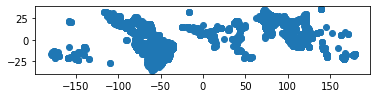

In [8]:
gdf.plot()

In [9]:
len(gdf)

8552

In [14]:
regions_gdf = geopandas.read_postgis("SELECT * FROM shape WHERE type='region'", con=get_engine(), geom_col='geometry')

In [20]:
gdfs = []

for i, row in regions_gdf.iterrows():
    gdfx = gdf[gdf['geometry'].within(row['geometry'])]
    gdfs.append(gdfx)
    
tza_gdf = pd.concat(gdfs)

In [22]:
len(tza_gdf)

11

<AxesSubplot:>

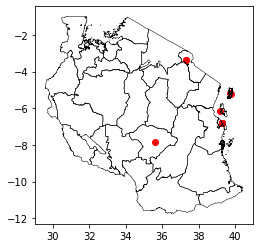

In [30]:
ax = tza_gdf.plot(color='red')
regions_gdf.plot(ax=ax, facecolor='none', edgecolor='black', lw=0.5)

In [31]:
tza_gdf

,UniqueID,Year,Admin,Longitude,Latitude,Area,geometry
4707,1017408,2007,-999,37.337326,-3.350571,-999,POINT (37.33733 -3.35057)
4711,1017408,2008,-999,37.337326,-3.350571,-999,POINT (37.33733 -3.35057)
4712,1014693,2010,-999,39.283333,-6.800000,-999,POINT (39.28333 -6.80000)
8381,1017096,2010,-999,39.269543,-6.822466,-999,POINT (39.26954 -6.82247)
8383,257,2013,-999,39.283330,-6.800000,-999,POINT (39.28333 -6.80000)
8384,257,2014,-999,39.283330,-6.800000,-999,POINT (39.28333 -6.80000)
8385,1282,2014,-999,39.269660,-6.822920,-999,POINT (39.26966 -6.82292)
4710,1019642,2007,-999,35.589942,-7.840595,-999,POINT (35.58994 -7.84060)
8382,1017421,2010,-999,39.202552,-6.166241,-999,POINT (39.20255 -6.16624)
4709,1019641,2007,-999,39.753944,-5.156264,-999,POINT (39.75394 -5.15626)
